In [ ]:
f = open("./team.txt", 'r', encoding='UTF8')
line = f.read()

In [ ]:
list_full = list(line.split('<'))

In [2]:
import time
from selenium import webdriver
import requests
from bs4 import BeautifulSoup
import pandas as pd


list_full = []
driver = webdriver.Firefox()
df = pd.DataFrame(columns=['team', 'cp1','cp2','cp3','cp4','cp5','pl1','pl2','pl3','pl4','pl5','score','date','stage','title'])



for i in range(1,50):
    driver.get('http://lol.inven.co.kr/dataninfo/match/teamList.php?pg=' + str(i));   
    res = driver.page_source
    soup = BeautifulSoup(res, 'html.parser')
    title = soup.find(id='lolDbMatchTeamList')

    list_page = []
    for j in title:
        list_page.append(str(j))
    match_list = []
    for k in list_page:
        if 'listFrame' in k:
            match_list.append(k.split('listFrame')[1].split('id="')[1].split('>')[0].split('"')[0])

    time.sleep(2)				
    for l in match_list:
        search_box = driver.find_element_by_xpath('//*[@id="{}"]/div[5]/a'.format(l))  
        search_box.send_keys('\n')		
        search_box.click()			


    res2 = driver.page_source
    soup2 = BeautifulSoup(res2, 'html.parser')
    title2 = soup2.find(id='lolDbMatchTeamList')

    
    for m in range(0,25):
        list_left = []
        list_right = []

        lTeam = str(soup2.find_all(class_='lTeam')[m]).split('<') #0부터 24까지
        for i in lTeam:
            if 'teamname' in i:
                list_right.append(i.split('>')[1])


        wTeam = str(soup2.find_all(class_='wTeam')[m]).split('<')
        for i in wTeam:
            if 'teamname' in i:
                list_left.append(i.split('>')[1])


        left = str(soup2.find_all(class_='left')[m]).split('<')
        for i in left:
            if 'champicon' in i:
                list_left.append(i.split('(')[2].split(')')[0].split('\'')[1])
        for i in left:
            if 'playername color1' in i:
                list_left.append(i.split('>')[1])

        right = str(soup2.find_all(class_='right')[m]).split('<')
        for i in right:
            if 'champicon' in i:
                list_right.append(i.split('(')[2].split(')')[0].split('\'')[1])
        for i in right:
            if 'playername color2' in i:
                list_right.append(i.split('>')[1])
        for i in lTeam:
            if 'color2 tx5' in i:
                list_right.append(i.split('>')[1])

        for i in wTeam:
            if 'color1 tx5' in i:
                list_left.append(i.split('>')[1])

        listTop = str(soup2.find_all(class_='listTop')[m]).split('<')
        for i in listTop:
            if 'title' in i:
                list_left.append(i.split('>')[1])
                list_right.append(i.split('>')[1])
            if 'date' in i:
                list_left.append(i.split('>')[1])
                list_right.append(i.split('>')[1])
            if 'stage' in i:
                list_left.append(i.split('>')[1])
                list_right.append(i.split('>')[1])

        a_series1 = pd.Series(list_right, index = df.columns)
        a_series2 = pd.Series(list_left, index = df.columns)
        df = df.append(a_series1, ignore_index=True)
        df = df.append(a_series2, ignore_index=True)

    list_full.append(str(title2))



KeyboardInterrupt: 

In [2]:
soup

 bold;}
	.broadWebzine .week ul.selected2 li.week2 {background: url('http://static.inven.co.kr/image_2011/common/module/afreecabroad/week_selected_orange2.png') no-repeat left top;}
	.broadWebzine .week ul.selected2 li.week2 a{color: white;font-weight: bold;}
	.broadWebzine .week ul.selected3 li.week3 {background: url('http://static.inven.co.kr/image_2011/common/module/afreecabroad/week_selected_orange2.png') no-repeat left top;}
	.broadWebzine .week ul.selected3 li.week3 a{color: white;font-weight: bold;}
	.broadWebzine .week ul.selected4 li.week4 {background: url('http://static.inven.co.kr/image_2011/common/module/afreecabroad/week_selected_orange2.png') no-repeat left top;}
	.broadWebzine .week ul.selected4 li.week4 a{color: white;font-weight: bold;}
	.broadWebzine .week ul.selected5 li.week5 {background: url('http://static.inven.co.kr/image_2011/common/module/afreecabroad/week_selected_orange2.png') no-repeat left top;}
	.broadWebzine .week ul.selected5 li.week5 a{color: white;font

In [ ]:
df.to_csv("./result.csv",index=False, encoding='utf-8-sig')

In [2]:
import time
from selenium import webdriver
import requests
from bs4 import BeautifulSoup
import pandas as pd



driver = webdriver.Firefox()
time = []
for i in range(1,70):

    driver.get('http://lol.inven.co.kr/dataninfo/match/teamList.php?pg=' + str(i));   
    res = driver.page_source
    soup = BeautifulSoup(res, 'html.parser')
    title = soup.find(id='lolDbMatchTeamList')

    
    for m in range(0,25):
        list_ = str(soup.find_all(class_='score')[m]).split('<')
        for i in range(len(list_)):
            if 'PLAY TIME' in list_[i]:
                time.append(list_[i+1].split('>')[1])




In [3]:
for i in range(len(time)):
    if '\t' in time[i]:
        time[i] = time[i].replace('\t','')
        time[i] = time[i].replace('\n','')

In [4]:
temp = time

In [5]:
max = 0
for i in time:
    if len(i) > max:
        max = len(i)

In [6]:
for i in range(len(temp)):
    if len(temp[i]) == 6:
        temp[i] = temp[i][:3] + ' 0' + temp[i][4:]
    if len(time[i]) == 3:
        temp[i] = temp[i][:3] + ' 00초'

In [12]:
temp

['31분 29초',
 '29분 02초',
 '29분 05초',
 '36분 50초',
 '31분 15초',
 '23분 27초',
 '26분 37초',
 '38분 10초',
 '28분 26초',
 '35분 53초',
 '26분 59초',
 '33분 29초',
 '29분 36초',
 '19분 05초',
 '45분 27초',
 '29분 18초',
 '35분 12초',
 '30분 34초',
 '34분 58초',
 '30분 18초',
 '41분 02초',
 '36분 34초',
 '31분 59초',
 '30분 47초',
 '38분 44초',
 '35분 38초',
 '39분 30초',
 '24분 36초',
 '29분 30초',
 '25분 12초',
 '29분 17초',
 '34분 34초',
 '32분 19초',
 '31분 40초',
 '35분 07초',
 '26분 14초',
 '28분 13초',
 '35분 34초',
 '26분 38초',
 '40분 11초',
 '31분 28초',
 '42분 22초',
 '36분 55초',
 '35분 47초',
 '28분 05초',
 '26분 09초',
 '24분 22초',
 '31분 01초',
 '38분 47초',
 '40분 36초',
 '33분 39초',
 '37분 26초',
 '35분 48초',
 '42분 24초',
 '33분 49초',
 '27분 06초',
 '35분 39초',
 '39분 21초',
 '31분 38초',
 '31분 37초',
 '29분 50초',
 '50분 03초',
 '31분 14초',
 '27분 52초',
 '39분 23초',
 '28분 45초',
 '30분 05초',
 '35분 56초',
 '29분 28초',
 '36분 42초',
 '31분 39초',
 '25분 44초',
 '41분 27초',
 '34분 23초',
 '29분 50초',
 '29분 25초',
 '36분 20초',
 '31분 00초',
 '31분 02초',
 '40분 26초',
 '43분 39초',
 '41분 40초',
 '30분 18초',
 '31

In [30]:
templst = []
for i in temp:
    i = i.strip('초').split('분 ')
    templst.append(int(i[0])*60+int(i[1]))

In [33]:
import numpy as np
np.mean(np.array(templst))

2040.4689855072463

(array([  1.,   1.,   1.,   3.,   0.,  14.,  29.,  46.,  57., 100., 106.,
        127., 138., 123., 133., 135., 106., 106.,  93.,  89.,  61.,  55.,
         47.,  31.,  26.,  28.,  10.,  17.,   7.,  11.,   7.,   1.,   3.,
          4.,   1.,   3.,   0.,   0.,   1.,   2.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 961.  , 1030.62, 1100.24, 1169.86, 1239.48, 1309.1 , 1378.72,
        1448.34, 1517.96, 1587.58, 1657.2 , 1726.82, 1796.44, 1866.06,
        1935.68, 2005.3 , 2074.92, 2144.54, 2214.16, 2283.78, 2353.4 ,
        2423.02, 2492.64, 2562.26, 2631.88, 2701.5 , 2771.12, 2840.74,
        2910.36, 2979.98, 3049.6 , 3119.22, 3188.84, 3258.46, 3328.08,
        3397.7 , 3467.32, 3536.94, 3606.56, 3676.18, 3745.8 , 3815.42,
        3885.04, 3954.66, 4024.28, 4093.9 , 4163.52, 4233.14, 4302.76,
        4372.38, 4442.  ]),
 <a list of 50 Patch objects>)

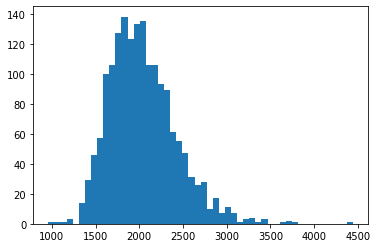

In [38]:
import matplotlib.pylab as plt
plt.hist(templst, bins=50)

In [8]:
hour = 0
minute = 0
second = 0

In [9]:
for i in temp:
    minute += int(i[:2])
    second += int(i[4:6])


In [10]:
minute, second

(57828, 50129)

In [ ]:
minute/60

In [ ]:
(second/60)

In [ ]:
len(temp)

In [ ]:
# 977시간 56분 30초

In [ ]:
978/1725

In [8]:
temp_df = pd.DataFrame(columns=['time'])

In [11]:
a = pd.Series(temp, index=temp_df.columns)

ValueError: Length of passed values is 1725, index implies 1.